In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('data_churn1.csv')
df.shape

(28382, 24)

In [5]:
df.isnull().sum()

Unnamed: 0                        0
vintage                           0
age                               0
gender                            0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
occupation_retired                0
occupation_salaried               0
occupation_self_employed          0
occupation_student                0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,14190.500000,45.696660,48.208336,0.601543,0.157987,717.828694,2.225530,925.975019,62.874780,7.380552e+03,...,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329,0.071313,0.236206,0.618561,0.072511
std,8193.322006,16.618105,17.807163,0.489589,0.364736,356.180417,0.660443,937.799129,83.701644,4.259871e+04,...,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571,0.257351,0.424758,0.485748,0.259336
min,0.000000,13.416408,1.000000,0.000000,0.000000,15.000000,1.000000,1.000000,0.000000,-5.503960e+03,...,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7095.250000,33.481338,36.000000,0.000000,0.000000,409.000000,2.000000,176.000000,9.000000,1.784470e+03,...,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14190.500000,44.922155,46.000000,1.000000,0.000000,834.000000,2.000000,572.000000,24.000000,3.281255e+03,...,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21285.750000,56.356011,60.000000,1.000000,0.000000,1020.000000,3.000000,1440.000000,83.000000,6.635820e+03,...,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000,0.000000,0.000000,1.000000,0.000000
max,28381.000000,113.573765,90.000000,1.000000,1.000000,1232.000000,3.000000,4782.000000,365.000000,5.905904e+06,...,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.groupby('churn')['vintage'].mean()

churn
0    46.243268
1    43.293872
Name: vintage, dtype: float64

In [8]:
from scipy.stats import ttest_ind

In [9]:
churned= df[df['churn']==1]
nchurned= df[df['churn']==0]

In [10]:
ttest_ind(churned['vintage'],nchurned['vintage'])

Ttest_indResult(statistic=-11.64563855810942, pvalue=2.845131788918903e-31)

In [11]:
df.groupby('churn')['age'].mean()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

In [12]:
pd.crosstab(df['gender'],df['churn'])# 17% churned female....19% churned male

churn,0,1
gender,,
0,9324,1985
1,13798,3275


In [13]:
df['gender'].value_counts()

1    17073
0    11309
Name: gender, dtype: int64

In [14]:
from scipy.stats import chi2_contingency

In [15]:
chi2_contingency(pd.crosstab(df['gender'],df['churn']))# males are more likely to churn by a lil value

(11.862741137017077,
 0.0005726818953372832,
 1,
 array([[ 9213.11739835,  2095.88260165],
        [13908.88260165,  3164.11739835]]))

In [16]:
pd.crosstab(df['dependents'],df['churn'])# 17% without dependent churn...22% with dependent churn

churn,0,1
dependents,,
0,19636,4262
1,3486,998


In [17]:
df['dependents'].value_counts()

0    23898
1     4484
Name: dependents, dtype: int64

In [20]:
pd.crosstab(df['customer_nw_category'],df['churn']) #1(high)-19% 2-17% 3-19%

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


In [21]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [22]:
df['branch_code'].value_counts()

19      145
6       142
60      128
16      111
8       109
       ... 
3386      1
3418      1
4082      1
4050      1
2049      1
Name: branch_code, Length: 3185, dtype: int64

In [23]:
df.groupby('churn')['days_since_last_transaction'].median()

churn
0    24
1    27
Name: days_since_last_transaction, dtype: int64

In [24]:
df.groupby('churn')['current_balance'].mean()

churn
0    7871.852338
1    5220.884321
Name: current_balance, dtype: float64

In [25]:
df.groupby('churn')['previous_month_end_balance'].mean()

churn
0    7356.086973
1    8109.794051
Name: previous_month_end_balance, dtype: float64

In [26]:
t=(df['current_month_balance']-df['previous_month_balance'])

In [27]:
t=pd.DataFrame(t)

In [28]:
t['churn']=df['churn']

In [29]:
t.groupby('churn')[0].mean()

churn
0     379.422990
1   -1905.529561
Name: 0, dtype: float64

In [30]:
df1=df.drop('branch_code',axis=1)

In [31]:
df1.shape

(28382, 23)

# logistic reg.

In [33]:
x = df1.drop('churn',axis=1)
y = df1['churn']
x.shape, y.shape

((28382, 22), (28382,))

In [34]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)

In [35]:
df1.columns

Index(['Unnamed: 0', 'vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)

In [37]:
train_x=pd.DataFrame(train_x)
valid_x=pd.DataFrame(valid_x)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)

c:\users\prachi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred_train = lr.predict(train_x)
pred_valid = lr.predict(valid_x)

In [40]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, precision_score, plot_roc_curve, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, recall_score, precision_score

In [41]:
roc_auc_score(train_y, pred_train)

0.5313180603123187

In [42]:
pred1= lr.predict_proba(train_x)
pred2= lr.predict_proba(valid_x)

In [43]:
roc_auc_score(train_y, pred1[:,1])

0.7518844516149057

In [44]:
k=f1_score(pred_train,train_y)

In [45]:
recall_score(pred_valid, valid_y)

0.7358916478555305

# decision tree

In [47]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [48]:
X= df1.drop('churn',axis=1)
Y= df1['churn']

In [49]:
X_train, X_valid ,Y_train,Y_valid= train_test_split(X,Y,random_state=101, stratify=Y,test_size=0.2)

In [50]:
Y_train.value_counts(normalize=True)

0    0.814666
1    0.185334
Name: churn, dtype: float64

In [51]:
Y_valid.value_counts(normalize=True)

0    0.814691
1    0.185309
Name: churn, dtype: float64

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model=DecisionTreeClassifier(random_state=10)

In [54]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [55]:
dt_model.score(X_train,Y_train)

1.0

In [56]:
dt_model.score(X_valid,Y_valid)

0.7805178791615289

# overfit

In [58]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,11):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model.fit(X_train,Y_train)
    train_accuracy.append(dt_model.score(X_train,Y_train))
    validation_accuracy.append(dt_model.score(X_valid,Y_valid))

In [59]:
max_depth=list(range(1,11))

Text(0, 0.5, 'score')

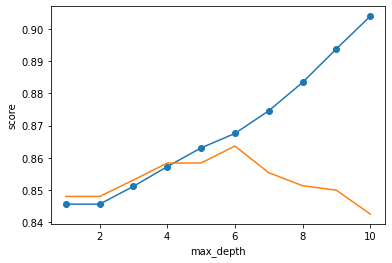

In [60]:
plt.plot(max_depth,train_accuracy,marker='o')
plt.plot(max_depth,validation_accuracy)
plt.xlabel("max_depth")
plt.ylabel('score')

In [61]:
dt_model=DecisionTreeClassifier(max_depth=6,random_state=10)

In [62]:
 dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [63]:
dt_model.score(X_train,Y_train)

0.8675622109667475

In [64]:
dt_model.score(X_valid,Y_valid)

0.8636603840056368

In [65]:
train_accuracy=[]
validation_accuracy=[]
for min_sample in range(2,40):
    dt_model=DecisionTreeClassifier(max_depth=6,random_state=10,min_samples_split=min_sample)
    dt_model.fit(X_train,Y_train)
    train_accuracy.append(dt_model.score(X_train,Y_train))
    validation_accuracy.append(dt_model.score(X_valid,Y_valid))

In [66]:
min_sample=list(range(2,40))

Text(0, 0.5, 'score')

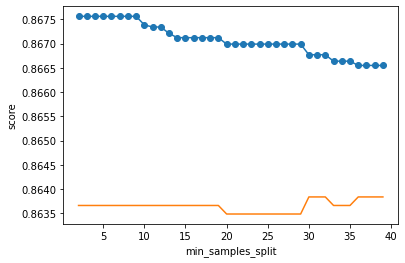

In [67]:
plt.plot(min_sample,train_accuracy,marker='o')
plt.plot(min_sample,validation_accuracy)
plt.xlabel("min_samples_split")
plt.ylabel('score')

In [68]:
train_accuracy=[]
validation_accuracy=[]
for max_leaf in range(2,30):
    dt_model=DecisionTreeClassifier(max_depth=6,random_state=10,max_leaf_nodes=max_leaf)
    dt_model.fit(X_train,Y_train)
    train_accuracy.append(dt_model.score(X_train,Y_train))
    validation_accuracy.append(dt_model.score(X_valid,Y_valid))

In [69]:
max_leaf=list(range(2,30))

Text(0, 0.5, 'score')

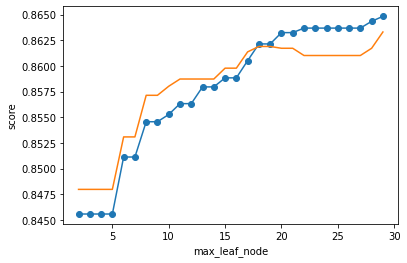

In [70]:
plt.plot(max_leaf,train_accuracy,marker='o')
plt.plot(max_leaf,validation_accuracy)
plt.xlabel("max_leaf_node")
plt.ylabel('score')

In [71]:
dt_model=DecisionTreeClassifier(max_depth=6,random_state=10,max_leaf_nodes=30)

In [72]:
 dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [73]:
dt_model.score(X_train,Y_train)

0.8648315349042062

In [74]:
dt_model.score(X_valid,Y_valid)

0.8633080852562973

In [75]:
result= dt_model.predict(X_valid)

In [76]:
f1_score(result,Y_valid, average='weighted')

0.8735127271361737

# knn

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scale=MinMaxScaler()
x_scaled= scale.fit_transform(X)

In [80]:
X= pd.DataFrame(x_scaled, columns=X.columns)

In [82]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [83]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=101, stratify=Y,test_size=0.2)

In [84]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(KNN(n_neighbors=3),X=train_x,y=train_y,cv=10)
score

array([0.77851167, 0.75913694, 0.76221929, 0.77366799, 0.75429326,
       0.76431718, 0.76431718, 0.77356828, 0.75418502, 0.769163  ])

In [85]:
n_neighbors=list(range(1,30))

In [86]:
avg=[]
std=[]
for i in range(1,30):
    val= cross_val_score(KNN(n_neighbors=i),X=train_x,y=train_y,cv=10)
    avg.append(val.mean())
    std.append(val.std())

Text(0, 0.5, 'mean score')

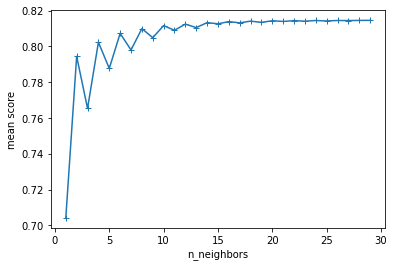

In [87]:
plt.plot(n_neighbors,avg,marker='+')
plt.xlabel("n_neighbors")
plt.ylabel('mean score')

Text(0, 0.5, 'standard deviation')

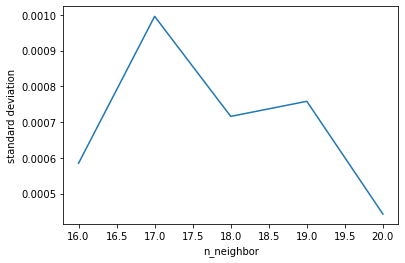

In [88]:
plt.plot(n_neighbors[15:20],std[15:20])
plt.xlabel("n_neighbor")
plt.ylabel('standard deviation')

In [89]:
clf=KNN(n_neighbors=20)
clf.fit(train_x,train_y)

score1=clf.score(train_x,train_y)
score2=clf.score(test_x,test_y)

score1,score2

(0.8147985025324819, 0.814514708472785)

In [90]:
res=clf.predict(test_x)

In [91]:
f1_score(res,test_y, average='weighted')

0.8972836475538155

# random forest

In [93]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [94]:
model=RFC(n_estimators=100,random_state=101)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [95]:
model.score(X_train,Y_train)

0.999955956837701

In [96]:
model.score(X_valid,Y_valid)

0.8680641183723797

# overfit

In [98]:
from sklearn.model_selection import validation_curve

In [99]:
param_range=[1,2,3,4,5,6,7,8,9,10,11,12,13,15,20]

In [100]:
train_scores, test_scores = validation_curve(RFC(), X=X_train,y=Y_train , param_name="max_depth", param_range=param_range,cv=3,n_jobs=-1)

In [101]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


Text(0, 0.5, 'score')

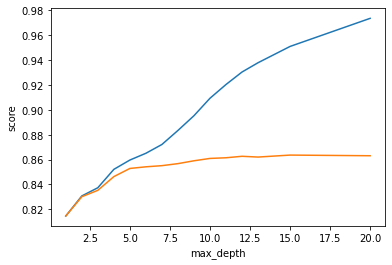

In [102]:
plt.plot(param_range,train_scores_mean)
plt.plot(param_range,test_scores_mean)
plt.xlabel("max_depth")
plt.ylabel('score')

In [103]:
min_sample=range(1,30)

In [104]:
train_scores, test_scores = validation_curve(RFC(), X=X_train,y=Y_train , param_name="min_samples_split", param_range=min_sample,cv=3,n_jobs=-1)

In [105]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


In [106]:
train_scores_mean.shape

(29,)

Text(0, 0.5, 'score')

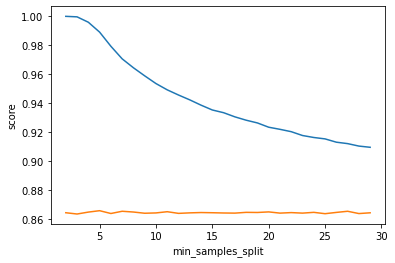

In [107]:
plt.plot(min_sample,train_scores_mean)
plt.plot(min_sample,test_scores_mean)
plt.xlabel("min_samples_split")
plt.ylabel('score')

In [108]:
n=[10,50,75,150,200,250]

In [109]:
train_scores, test_scores = validation_curve(RFC(), X=X_train,y=Y_train , param_name="n_estimators", param_range=n,cv=5,n_jobs=-1)

In [110]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


Text(0, 0.5, 'score')

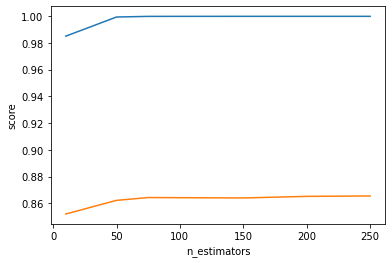

In [111]:
plt.plot(n,train_scores_mean)
plt.plot(n,test_scores_mean)
plt.xlabel("n_estimators")
plt.ylabel('score')

In [112]:
num=[1,2,4,6,8,10]

In [113]:
train_scores, test_scores = validation_curve(RFC(), X=X_train,y=Y_train , param_name="min_samples_leaf", param_range=num,cv=3,n_jobs=-1)

In [114]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


Text(0, 0.5, 'score')

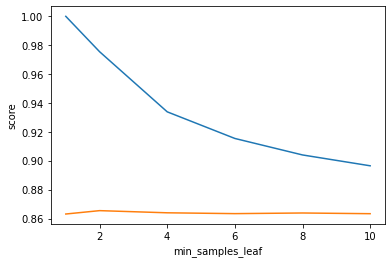

In [115]:
plt.plot(num,train_scores_mean)
plt.plot(num,test_scores_mean)
plt.xlabel("min_samples_leaf")
plt.ylabel('score')

In [116]:
model=RFC(n_estimators=50,random_state=101,max_depth=6,min_samples_split=13,min_samples_leaf=10)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [117]:
model.score(X_train,Y_train)

0.8603831755120017

In [118]:
model.score(X_valid,Y_valid)

0.8559098115201691

In [119]:
predi=model.predict(X_valid)

In [120]:
f1_score(predi,Y_valid,average='weighted')

0.8777015179015962

In [121]:
from statistics import mode
final_pred_mode = np.array([])
for i in range(0,len(X_valid)):
    final_pred_mode = np.append(final_pred_mode, mode([result[i], res[i], predi[i]]))

In [122]:
f1_score(final_pred_mode,Y_valid,average="weighted")

0.8798419194842707

Feature Ranking:
1. Feature 8 (0.402307)
2. Feature 14 (0.138816)
3. Feature 16 (0.120169)
4. Feature 9 (0.080662)
5. Feature 15 (0.068554)
6. Feature 17 (0.040687)
7. Feature 11 (0.037705)
8. Feature 10 (0.036622)
9. Feature 12 (0.017548)
10. Feature 13 (0.017177)
11. Feature 1 (0.014389)
12. Feature 7 (0.009122)
13. Feature 0 (0.004467)
14. Feature 2 (0.003978)
15. Feature 5 (0.002701)
16. Feature 6 (0.001781)
17. Feature 4 (0.001300)
18. Feature 20 (0.000688)
19. Feature 19 (0.000618)
20. Feature 3 (0.000365)
21. Feature 21 (0.000307)
22. Feature 18 (0.000036)


<Figure size 432x288 with 0 Axes>

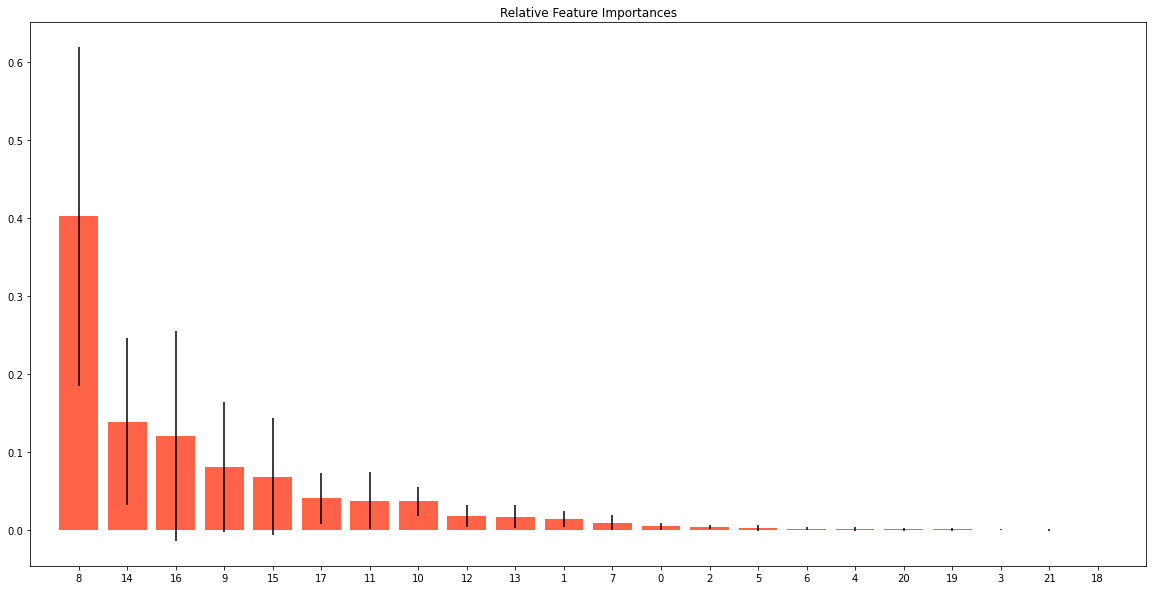

In [123]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:40]

# Print the feature ranking
print("Feature Ranking:")

for f in range(X_train.shape[1]):
     print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
fig = plt.figure(figsize=(20, 10));
plt.title("Relative Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="#FF6347", yerr=std[indices], align="center", ecolor='k')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1,X_train.shape[1]])
plt.show()

In [124]:
col=df1.columns

In [125]:
col=list(col)
